KNN classification accuracy 0.9425287356321839
Classification Report is : 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97        79
           1       0.67      0.75      0.71         8

    accuracy                           0.94        87
   macro avg       0.82      0.86      0.84        87
weighted avg       0.95      0.94      0.94        87



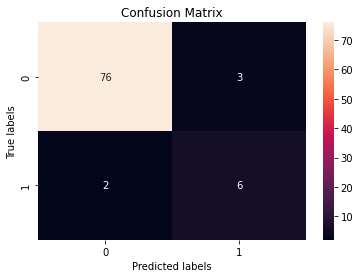

In [ ]:
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import seaborn as sns
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]


if __name__ == "__main__":
    # Imports
    from matplotlib.colors import ListedColormap
    import pandas as pd
    from sklearn.model_selection import train_test_split

    cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    import csv
    # filename = r'data.csv'
    # # load the file and store it in mydata list
    # mydata = csv.reader(open(filename, "rt"))
    # # next(mydata)
    # data = list(mydata)
    # X = data[:,:-1]
    # # y = data[-1].astype(int)
    # y = np.array(data[-1], dtype=np.float32)
    #===============================================================

    data = pd.read_csv("data.csv" , index_col= 0)
    X = data[['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan', 'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'diff_sym_hos']].values
    Y = data['result'].values
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.1, random_state=3 )

    k = 3
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print("KNN classification accuracy", accuracy(y_test, predictions))


    #Calculating Prediction
    Y_pred = clf.predict(X_test)
    #print('Predicted Value for SVM_model is : ' , yPred[:10])

    #----------------------------------------------------
    #Calculating Confusion Matrix
    CM = confusion_matrix(y_test, Y_pred)

    # drawing confusion matrix
    ax= plt.subplot()
    sns.heatmap(CM, annot=True, fmt='g', ax = ax);
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 

    #Calculating classification Report :  

    ClassificationReport = classification_report(y_test, Y_pred)
    print('Classification Report is : \n', ClassificationReport)

  

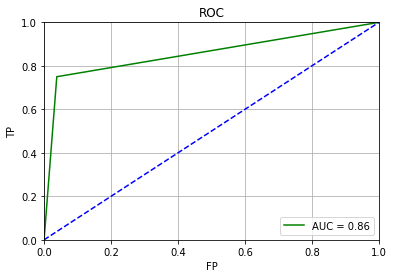

In [ ]:
    #Calculating Area Under the Curve with predict probapility:
    fpr, tpr, threshold = roc_curve(y_test, Y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'b--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('TP')
    plt.xlabel('FP')
    plt.title('ROC')
    plt.grid()  